In [98]:
%matplotlib inline
#import bokeh as bk

import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#from mpl_toolkits.basemap import Basemap
#import geopandas as gpd

# import requests
# import descartes

import seaborn as sns

In [86]:
# I saved .xsls file to csv first. It caused an encoding issue, however 'unicode_escape' fixed the problem. While I import the database, I parsed dates for the further steps.
stats = pd.read_csv('data/north_korea_missile_test_database.csv', encoding= 'unicode_escape', parse_dates=['Date', 'Date Entered/Updated'])
stats.head(1)

,F1,Date,Date Entered/Updated,Launch Time (UTC),Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Test Outcome,Additional Information,Source(s)
0,1,1984-04-09,2016-12-23,NaN,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,First known test by North Korea of a missile w...,http://www.nti.org/media/pdfs/north_korea_miss...


In [87]:
# Checking the types of longigute and latitue : the result is object. 
print(stats['Facility Latitude'].dtype)
print(stats['Facility Longitude'].dtype)

object
object


In [88]:
# Now, I need to make a new column, which measures the frequencies of testing by facility names.
# First, I counted values by 'Facility Name' columm. The total number is 245.
stats_frequencies = stats['Facility Name'].value_counts()
stats_frequencies.sum()

#Now, I'm adding a new column called 'Frequencies' by using .map function
stats['Frequencies'] = stats['Facility Name'].map(stats_frequencies)

In [89]:
#success_count = len(stats[(stats.groupby('Facility Name')) & (stats['Test Outcome'] == 'Success')])
#success_count = stats[stats['Test Outcome'] == 'Success'].groupby('Facility Name').size()
success_count_by_facilities = stats.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Success').sum())

In [90]:
success_count = len(stats[(stats['Facility Name'] == 'Hodo Peninsula') & (stats['Test Outcome'] == 'Success')])
success_count

26

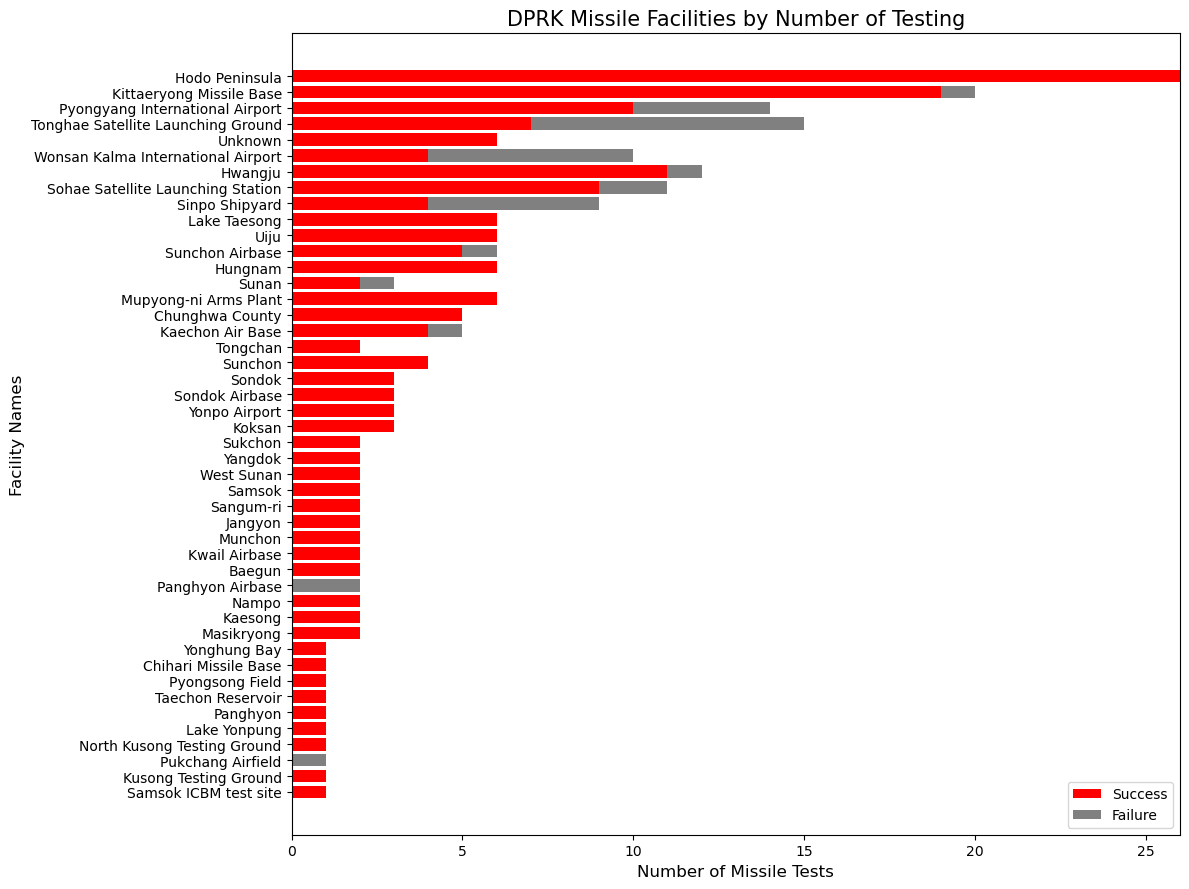

In [91]:
# I already counted the frequencies by facilities from the previous code.

# Now, I need to count the success and failure by facilities.
facility_success = stats.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Success').sum())
facility_failure = stats.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Failure').sum())

plt.figure(figsize=(12, 9))

#because otherwise, the highest number goes to the bottom. Data doesn't change, but I prefer this look.
facility_names_reversed = facility_frequencies.index[::-1]
facility_counts_reversed = facility_frequencies.values[::-1]

success_color = 'red'  # Color for success
failure_color = 'grey'  # Color for failure

success_counts = facility_success.reindex(facility_names_reversed).values
failure_counts = facility_failure.reindex(facility_names_reversed).values

bar_positions = np.arange(len(facility_names_reversed))

plt.barh(bar_positions, success_counts, color=success_color)
plt.barh(bar_positions, failure_counts, left=success_counts, color=failure_color)

plt.yticks(bar_positions, facility_names_reversed)
plt.tick_params(axis='x', labelsize=10)
plt.xlabel('Number of Missile Tests', size=12)
plt.ylabel('Facility Names', size=12)
plt.title('DPRK Missile Facilities by Number of Testing', size=15)
plt.xticks(rotation=0)
plt.legend(['Success', 'Failure', "Max = 26"], loc='lower right')

plt.tight_layout()
plt.show()

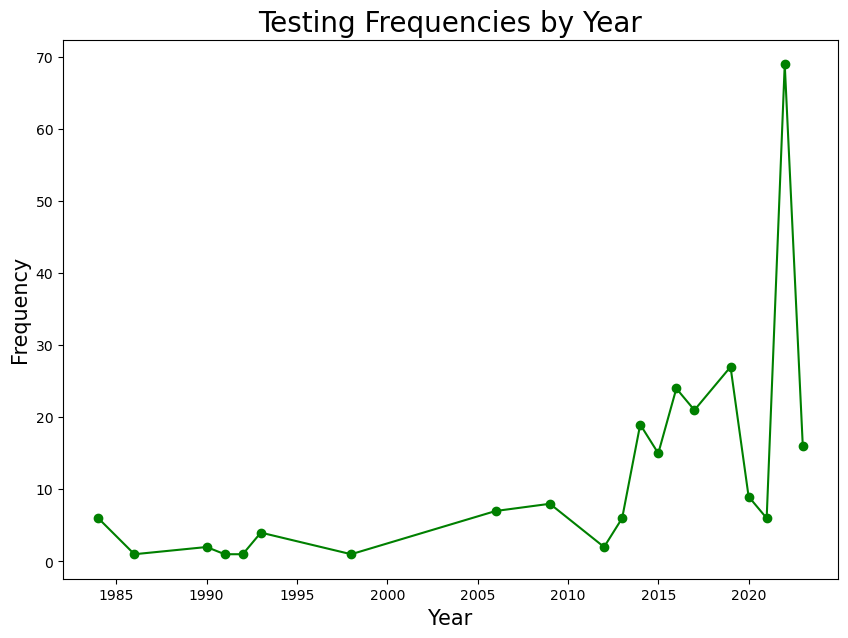

In [92]:
stats['Year'] = pd.to_datetime(stats['Date']).dt.year

yearly_frequencies = stats['Year'].value_counts().sort_index()

yearly_frequencies = yearly_frequencies.sort_index()
plt.figure(figsize=(10, 7))
plt.plot(yearly_frequencies.index, yearly_frequencies.values, marker='o', color="green")
plt.tick_params(axis='x', labelsize=10)

plt.xlabel('Year', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Testing Frequencies by Year', size = 20)

#plt.tight_layout()
plt.show()


In [93]:
all_years = pd.Series(range(yearly_frequencies.index.min(), yearly_frequencies.index.max() + 1))

In [94]:
stats['Facility Latitude'] = stats['Facility Latitude'].replace('Unknown', None)
stats['Facility Longitude'] = stats['Facility Longitude'].replace('Unknown', None)

stats['Facility Latitude'] = stats['Facility Latitude'].astype(float)
stats['Facility Longitude'] = stats['Facility Longitude'].astype(float)

In [95]:
average = yearly_frequencies.mean()
q1 = yearly_frequencies.quantile(0.25)
q3 = yearly_frequencies.quantile(0.75)

print(average, q1, q3)

12.25 2.0 16.75


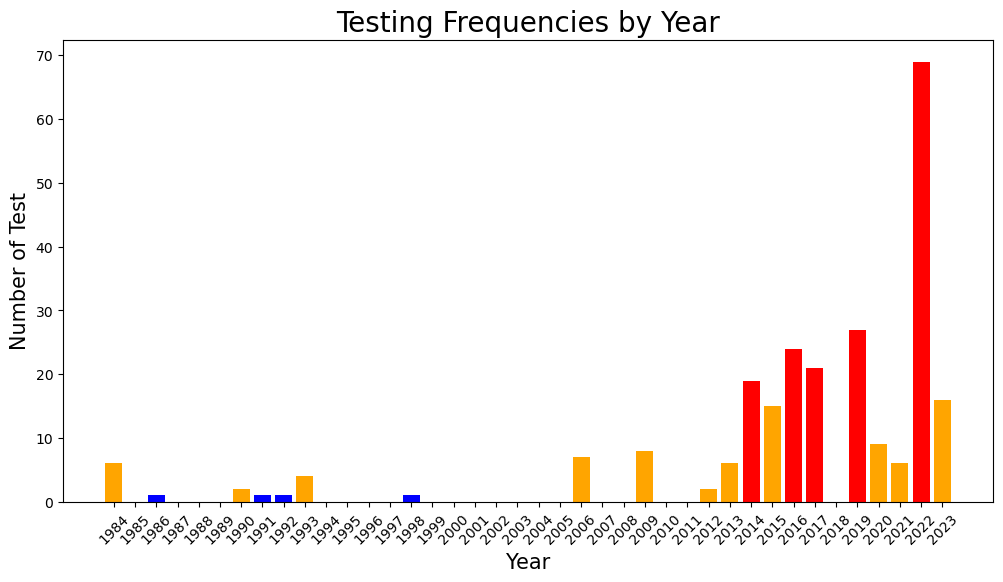

In [96]:
stats['Year'] = pd.to_datetime(stats['Date']).dt.year

yearly_frequencies = stats['Year'].value_counts().sort_index()

all_years = pd.Series(range(yearly_frequencies.index.min(), yearly_frequencies.index.max() + 1))
#yearly_frequencies = yearly_frequencies.reindex(all_years).fillna(0)

average = yearly_frequencies.mean()
q1 = yearly_frequencies.quantile(0.25)
q3 = yearly_frequencies.quantile(0.75)

color_q1 = 'blue'  # Color for below 1st quartile
color_mean = 'orange'  # Color for between 1st quartile and 3rd quartile
color_q3 = 'red'  # Color for above 3rd quartile

bar_colors = []
for freq in yearly_frequencies.values:
    if freq < q1:
        bar_colors.append(color_q1)
    elif freq > q3:
        bar_colors.append(color_q3)
    else:
        bar_colors.append(color_mean)

plt.figure(figsize=(12, 6))
plt.bar(yearly_frequencies.index, yearly_frequencies.values, color=bar_colors)

plt.tick_params(axis='x', labelsize=10)
plt.xticks(all_years, rotation = 45)

plt.xlabel('Year', size=15)
plt.ylabel('Number of Test', size=15)
plt.title('Testing Frequencies by Year', size=20)


# plt.text(1, 4, 'Kim, Il-sung', fontsize=5, color='gray')
# plt.text(3, 4, 'Kim, Jong-il', fontsize=5, color='gray')
# plt.text(5, 4, 'Kim, Jong-un', fontsize=5, color='gray')

#plt.tight_layout()
plt.show()

In [97]:
map_fig2 = px.scatter_mapbox(stats, lat = 'Facility Latitude', lon = 'Facility Longitude', 
                             color = stats['Facility Name'],
                             size = 'Frequencies',  # Column containing frequencies
                             zoom = 6,
                             center={'lat': 39.17180415583127, 'lon': 126.551952046587},
                             width = 1200,
                             height = 800,
                             title = 'DPRK Nuclear Facility Locations')

map_fig2.update_layout(mapbox_style="carto-positron", title_font_size=25, title_font_family="Arial")
#map_fig2.update_layout(margin={"r":10, "t":50, "l":0, "b":10})
map_fig2.update_layout(margin_autoexpand=True)